In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.layers import Input
import numpy as np
import tensorflow as tf
from keras import backend as K

In [12]:
class VGG:
    @staticmethod
    def build(numChannels, imgRows, imgCols, numClasses):
        # sequential initialize the mode
        model = Sequential()
        inputShape = (imgRows, imgCols, numChannels)
        model = Sequential()
        #2convolution
        model.add(Conv2D(input_shape=inputShape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
        #maxpooling
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        #2convolution
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        #maxpooling
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        #3convolution
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        #maxpooling
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        #3convolution
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        #maxpooling
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        #3convolution
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        #maxpooling
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        model.add(Flatten())
        model.add(Dense(units=4096,activation="relu"))
        model.add(Dense(units=4096,activation="relu"))
        model.add(Dense(units=numClasses, activation="softmax"))
        return model

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 227, 227, 64)      1792      
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 227, 227, 64)      36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 113, 113, 64)      0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 113, 113, 128)     73856     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 113, 113, 128)     147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 56, 56, 256)     

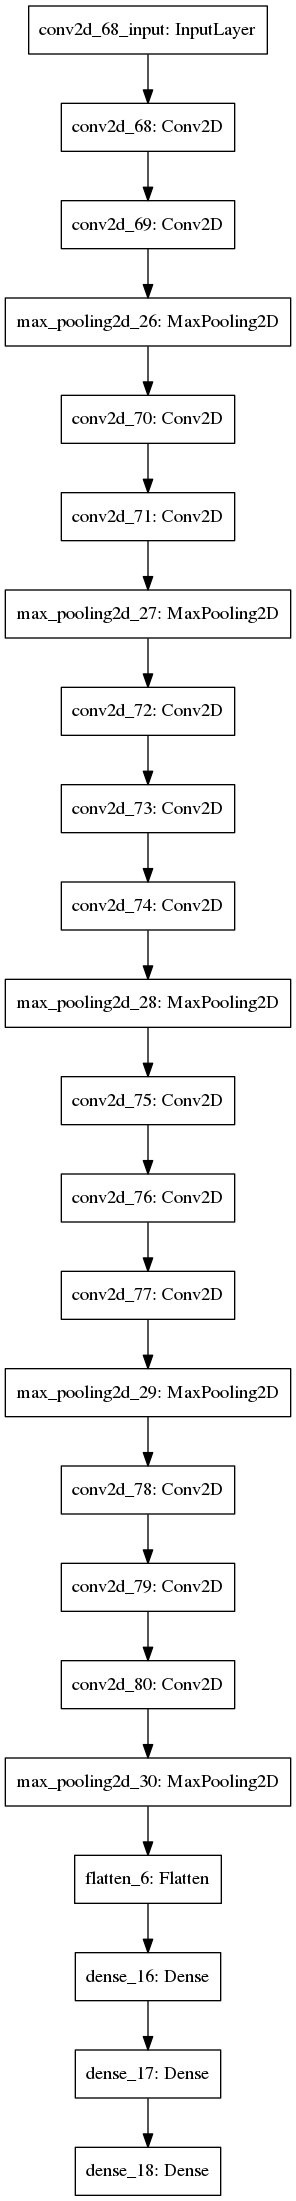

In [13]:
model = VGG.build(numChannels=3, imgRows=227, imgCols=227, numClasses=2)
model.summary()
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, to_file='VGG.png')

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(rescale=1./225,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (227, 227),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (227, 227),
                                            batch_size = 32,
                                            class_mode = 'categorical')

model.fit_generator(training_set,samples_per_epoch = 8000,nb_epoch = 1,validation_data = test_set,nb_val_samples = 2000)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/home/marzan/work_env/local/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/marzan/work_env/local/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=1, validation_steps=2000, validation_data=<keras.pre..., steps_per_epoch=250)`


Epoch 1/1


In [ ]:
# serialize model to JSON
from keras.models import model_from_json
model_json = model.to_json()
with open("model_alexnet.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_alexnet_weights.h5")
print("Saved model to disk")

In [ ]:
from keras.models import model_from_json
# Model reconstruction from JSON file
with open('model_alexnet.json', 'r') as f:
    model_after = model_from_json(f.read())

# Load weights into the new model
model_after.load_weights('model_alexnet_weights.h5')

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img = cv2.imread("/media/marzan/mini storage/CNN/cat.jpg")

In [ ]:
reshape = cv2.resize(img,(64,64))
dimention_currection = np.reshape(reshape,[1,64,64,3])

In [ ]:
predict = model_after.predict(dimention_currection)
predict